In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [54]:
# ### Analyzing lab markers for long covid

# ## Read the list of unique patient IDs
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
# df = pd.read_csv(filename, sep=',', header=0)

# ## Read the CSV file into a DataFrame
# lab_dict_dirpath = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/dicts/'
# lab_dict_filename = os.path.join(lab_dict_dirpath, 'lab_data_dict.csv')

# df_lab_markers = pd.read_csv(lab_dict_filename, sep=',', header=0, index_col=0)
# print('df_lab_markers', df_lab_markers)


# for row in df.itertuples(5):
#     patient_id = row.pseudoid_pid
#     ## Read the folder with the lab markers
#     dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
#     filename = os.path.join(dir_lab_path, 'patient_'+ str(patient_id) +'.csv')

#     try:
#         ## Read the CSV file into a DataFrame per patient
#         df_lab = pd.read_csv(filename, sep=',', header=0, index_col=0)
#         # print('+ patient_id: ', patient_id, df_lab.shape)

#         ## Added the patient ID to the dataframe and append the corrsponding lab markers to the lab dictionary
#         for row_labdata in df_lab.itertuples():
#             # print('row_labdata', row_labdata)
#             # print('row_labdata', type(row_labdata))

#             ## Add the 'row_labdata' value into 'df_lab_markers' according to the 'df_lab_markers' column names
#             for col in df_lab_markers.columns:
#                 df_lab_markers[col].append(row_labdata[col])

#     ## make an exception for FileNotFoundError
#     except FileNotFoundError:
#         continue
    
# ## Save the dataframe to a CSV file
# filename = os.path.join(dir_path, '116_plcp_lab_markers.csv')
# df_lab_markers.to_csv(filename, sep=',', header=True, index=False)

# print('###############################')
# print('df_lab_markers', df_lab_markers)
# print(df_lab_markers)
# print(df_lab_markers.shape)


df_lab_markers Empty DataFrame
Columns: []
Index: [pseudoid_pid, ALAT, ALAT , aPTT, ASAT, ASAT , Basophile, Bicarbonat, Bicarbonat akt., Bicarbonat Std., C-reaktives Prot. , C-reaktives Protein, Creatinin , Creatinin , Creatinin ABL, D-Dimer , D-Dimere, eGFR , eGFR nach CKD-EPI, Eosinophile, Erythrozyten, Ferritin ECLIA, Ferritin PETIA, Fibrinogen Clauss, G-Glutamyltransfer. , G-Glutamyltransferase, Glucose, Hämatokrit, Hämoglobin, Harnstoff, Harnstoff , Immature Granulozyten, INR, INR kapillär, INR venös kontr., Kalium, Lactat arteriell, Lactat enzymatisch, Lactat venös, Lactat-Dehydrogenase, LDH nach IFCC, Leukozyten, Lymphozyten, MCH, MCHC, MCV, Monozyten, Natrium, Neutrophile, Neutrophile Granulozyten, Normoblasten maschinell, NT-proBNP, PCT hs, pH, pO2, POCT-BNP, RDW, Thrombozyten, Troponin T , Troponin-I-hs, Troponin-T-hs]

[61 rows x 0 columns]
###############################
df_lab_markers Empty DataFrame
Columns: []
Index: [pseudoid_pid, ALAT, ALAT , aPTT, ASAT, ASAT , Basophi

In [ ]:
## Automatizing and improving the analysis of lab markers for long covid

In [84]:
### V2: 2021-07-28 - Saving only one row per patient_id (the first one)

import os
import pandas as pd

# Read the list of unique patient IDs
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
df = pd.read_csv(filename, sep=',', header=0)

# Read the lab markers dictionary
lab_dict_dirpath = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/dicts/'
lab_dict_filename = os.path.join(lab_dict_dirpath, 'lab_data_dict.csv')
df_lab_markers = pd.read_csv(lab_dict_filename, sep=',', header=0, index_col=0)

# Iterate through the patient IDs
for row in df.itertuples():
    patient_id = row.pseudoid_pid
    dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
    filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

    try:
        # Read the CSV file into a DataFrame per patient
        df_lab = pd.read_csv(filename, sep=',', header=0)   #, index_col=0)

        # ## Print the days for the row 0
        # print(df_lab.iloc[0])
        
        # Append the laboratory values to df_lab_markers using the corresponding column names per each day 'days' at each patient_id
        for col in df_lab.columns:
            df_lab_markers.loc[patient_id, col] = df_lab[col].values[0] if col in df_lab.columns else None
    
    # Make an exception for FileNotFoundError
    except FileNotFoundError:
        continue

# Save the updated df_lab_markers to a CSV file
updated_lab_markers_filename = os.path.join(dir_path, '999_116_plcp_lab_markers.csv')
df_lab_markers.to_csv(updated_lab_markers_filename, sep=',', header=True, index=True)

# Print some information about the updated dataframe
print('Updated df_lab_markers:')
print(df_lab_markers)
print('Shape:', df_lab_markers.shape)

Updated df_lab_markers:
             days ALAT   aPTT ASAT  Basophile Bicarbonat Bicarbonat akt.  \
pseudoid_pid                                                               
1000037         0   NaN   NaN   NaN       NaN        NaN             NaN   
1000065         0   NaN  32.4   NaN      0.01        NaN            28.5   
1000066         0   NaN   NaN   NaN     0.005        NaN            21.8   
1000095         0   NaN  42.7   NaN       NaN        NaN             NaN   
1000104         0   NaN   NaN   NaN       NaN        NaN             NaN   
...           ...   ...   ...   ...       ...        ...             ...   
1001231         0   NaN   NaN   NaN      0.02        NaN             NaN   
1001260         0   NaN  33.0   NaN     0.005        NaN       24.966667   
1001269         0   NaN   NaN   NaN       0.0        NaN             NaN   
1001343         0   NaN   NaN   NaN       NaN        NaN             NaN   
1001362         0   NaN  42.7   NaN      0.01        NaN        

In [86]:
import os
import pandas as pd

# Read the list of unique patient IDs
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
df = pd.read_csv(filename, sep=',', header=0)

# Read the lab markers dictionary
lab_dict_dirpath = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/dicts/'
lab_dict_filename = os.path.join(lab_dict_dirpath, 'lab_data_dict.csv')
df_lab_markers = pd.read_csv(lab_dict_filename, sep=',', header=0, index_col=0)

# Iterate through the patient IDs
for row in df.itertuples():
    patient_id = row.pseudoid_pid
    dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
    filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

    try:
        # Read the first row of the CSV file into a DataFrame per patient
        df_lab = pd.read_csv(filename, sep=',', nrows=1, header=0)  # Read only the first row

        # Append the laboratory values to df_lab_markers using the corresponding column names per the days column
        days_col = df_lab['days'].iloc[0]
        for col in df_lab.columns:
            df_lab_markers.loc[patient_id, f"{col}_{days_col}"] = df_lab[col].iloc[0] if col in df_lab.columns else None
    
    # Make an exception for FileNotFoundError
    except FileNotFoundError:
        continue

# Save the updated df_lab_markers to a CSV file
updated_lab_markers_filename = os.path.join(dir_path, '999_116_plcp_lab_markers.csv')
df_lab_markers.to_csv(updated_lab_markers_filename, sep=',', header=True, index=True)

# Print some information about the updated dataframe
print('Updated df_lab_markers:')
print(df_lab_markers)
print('Shape:', df_lab_markers.shape)

/tmp/ipykernel_13666/1137397173.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lab_markers.loc[patient_id, f"{col}_{days_col}"] = df_lab[col].iloc[0] if col in df_lab.columns else None
/tmp/ipykernel_13666/1137397173.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lab_markers.loc[patient_id, f"{col}_{days_col}"] = df_lab[col].iloc[0] if col in df_lab.columns else None
/tmp/ipykernel_13666/1137397173.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

Updated df_lab_markers:
             days ALAT  aPTT ASAT  Basophile Bicarbonat Bicarbonat akt.  \
pseudoid_pid                                                              
1000037       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
1000065       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
1000066       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
1000095       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
1000104       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
...           ...   ...  ...   ...       ...        ...             ...   
1001231       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
1001260       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
1001269       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
1001343       NaN   NaN  NaN   NaN       NaN        NaN             NaN   
1001362       NaN   NaN  NaN   NaN       NaN        NaN             NaN   



/tmp/ipykernel_13666/1137397173.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lab_markers.loc[patient_id, f"{col}_{days_col}"] = df_lab[col].iloc[0] if col in df_lab.columns else None
/tmp/ipykernel_13666/1137397173.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lab_markers.loc[patient_id, f"{col}_{days_col}"] = df_lab[col].iloc[0] if col in df_lab.columns else None


/home/jagh/anaconda3/envs/patientomics/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ValueError: The condensed distance matrix must contain only finite values.

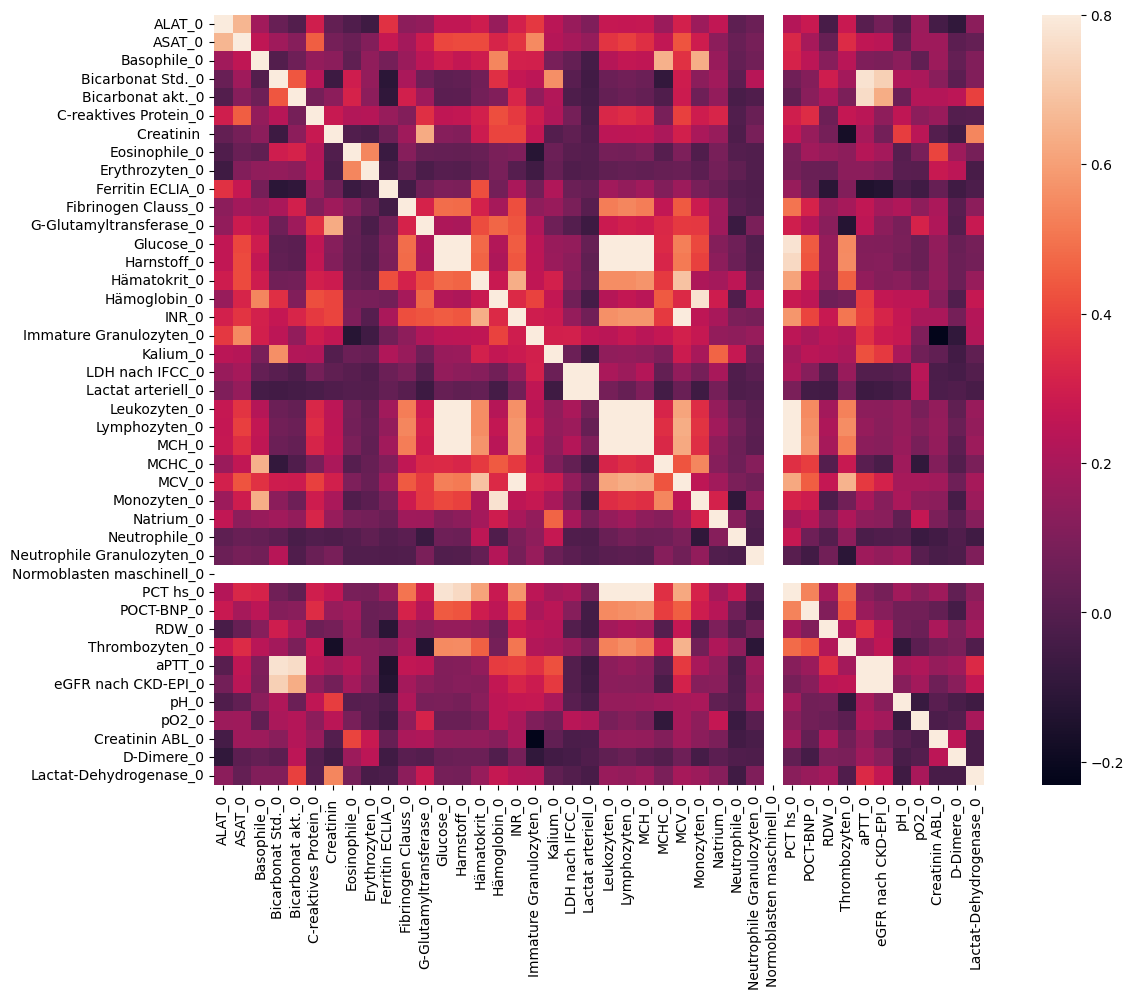

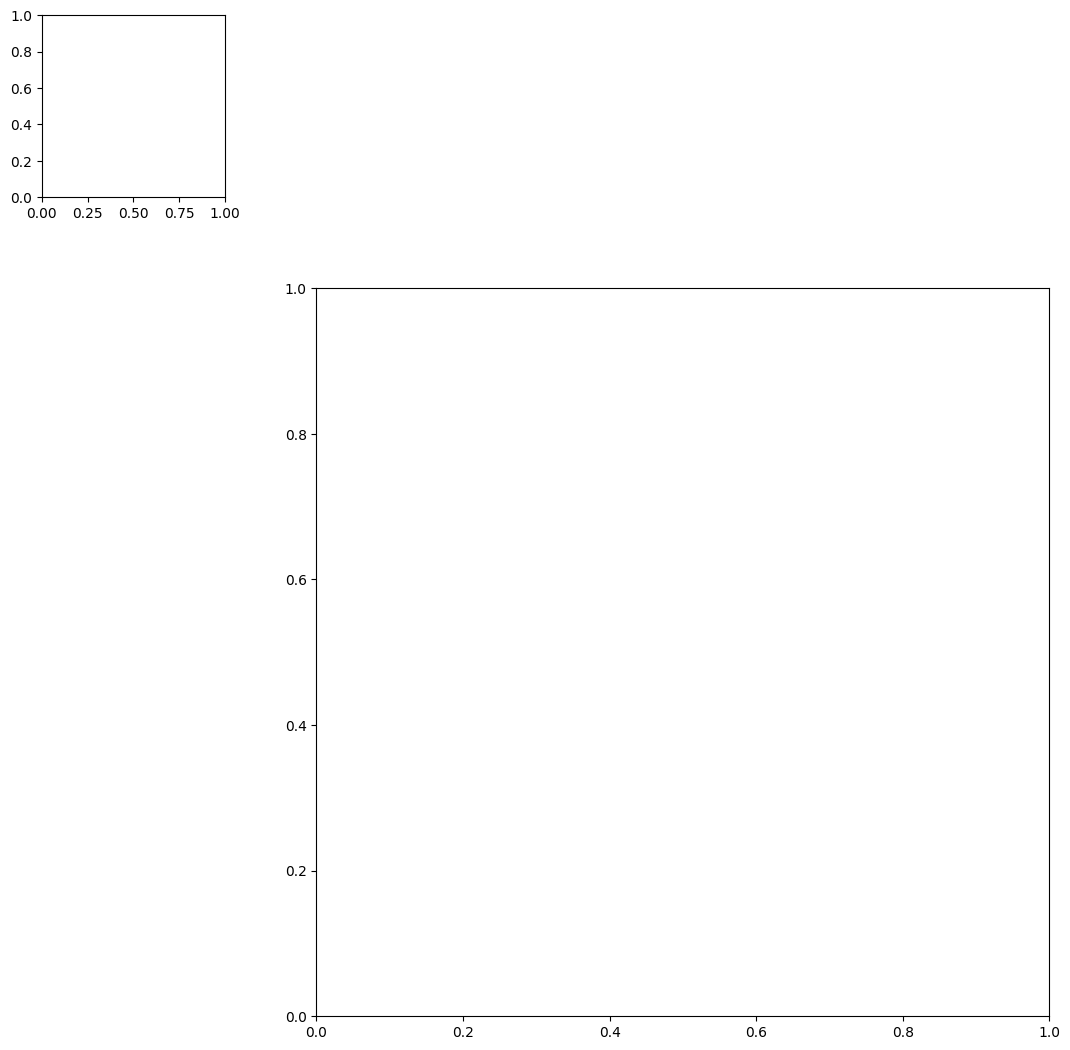

In [35]:
import os
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


## Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_data_exploration.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

## Extract the feature columns
feature_columns = df.columns[:]

## Extract a list of the valid features, sorted
feature_names = df.columns[:]

## Extract the sample ids
samples = df.values


## Multidimensional scaling to visualize very high dimensional data in a lower dimensional space
similarities = euclidean_distances(samples)
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-12, random_state=seed,
                   n_init=10, dissimilarity="precomputed", n_jobs=1, metric=False)
pos = mds.fit_transform(similarities)

### features as a heatmap
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)
corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8, square=True)

### Clustermap
# Choose a subset of features for clustering
dd = d.iloc[:,1:50]
pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()



/home/jagh/anaconda3/envs/patientomics/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ValueError: The condensed distance matrix must contain only finite values.

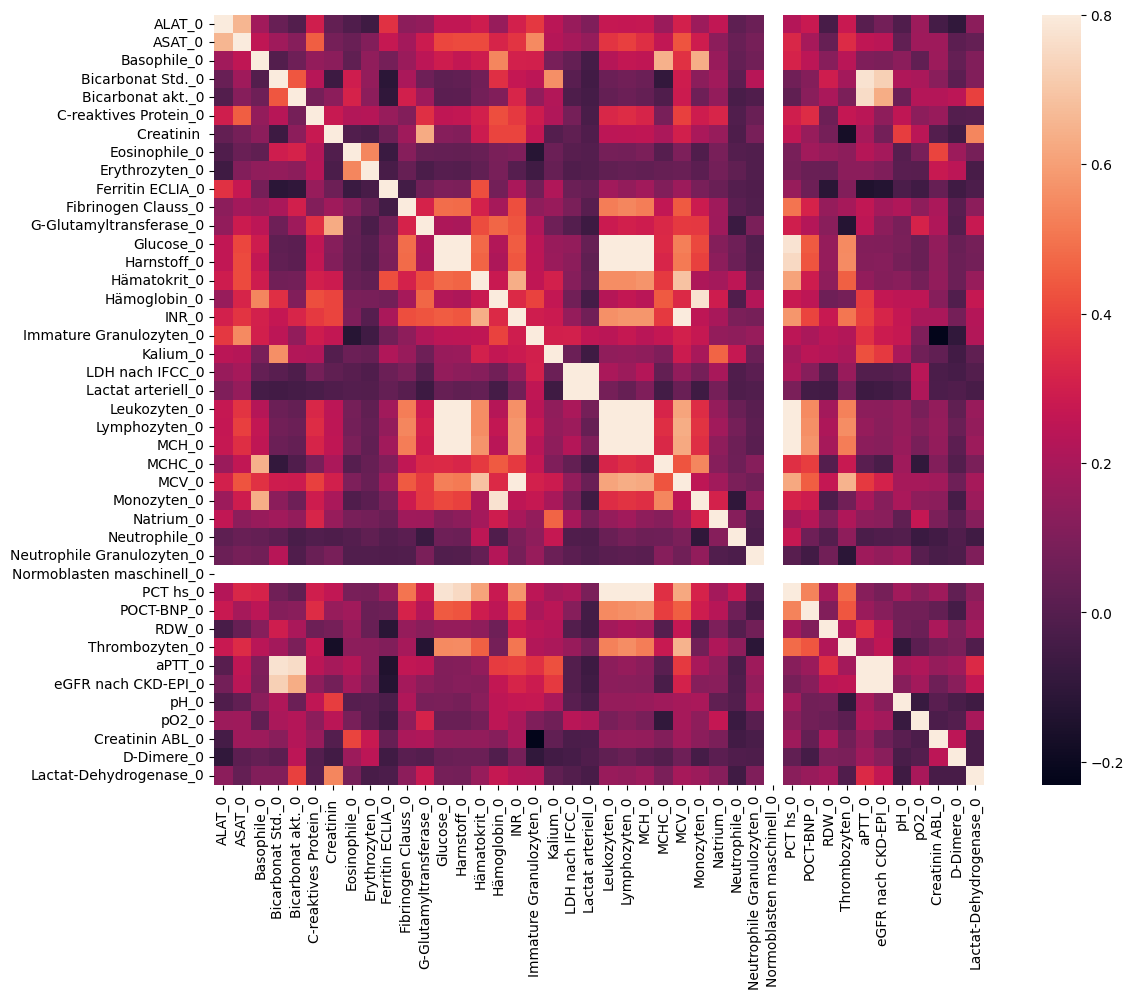

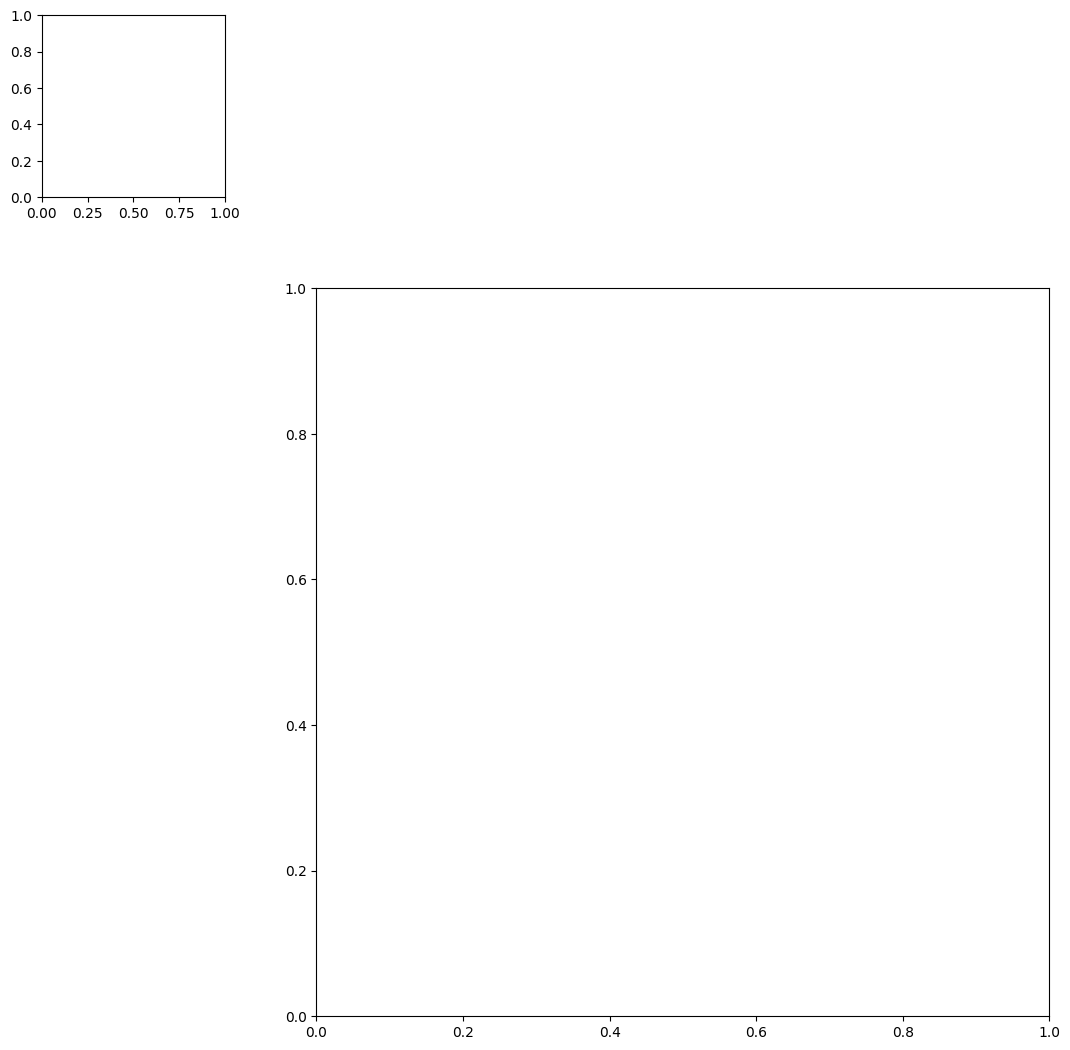

In [37]:
import os
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_data_exploration.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

# Extract the feature columns
feature_names = df.columns

# Extract the sample ids
samples = df.values

# Standardize the data before calculating distances
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

# Calculate pairwise Euclidean distances
similarities = euclidean_distances(scaled_samples, scaled_samples)

# Debugging: Output non-finite values in the similarities matrix
print("Number of NaN values:", np.sum(np.isnan(similarities)))
print("Number of infinite values:", np.sum(np.isinf(similarities)))

# Replace NaN with infinity
similarities[np.isnan(similarities)] = np.inf

# Multidimensional scaling
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-12, random_state=seed,
                   n_init=10, dissimilarity="precomputed", n_jobs=1, metric=False)
pos = mds.fit_transform(similarities)

### features as a heatmap
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)
corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8, square=True)

### Clustermap
# Choose a subset of features for clustering
dd = d.iloc[:,1:50]
pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

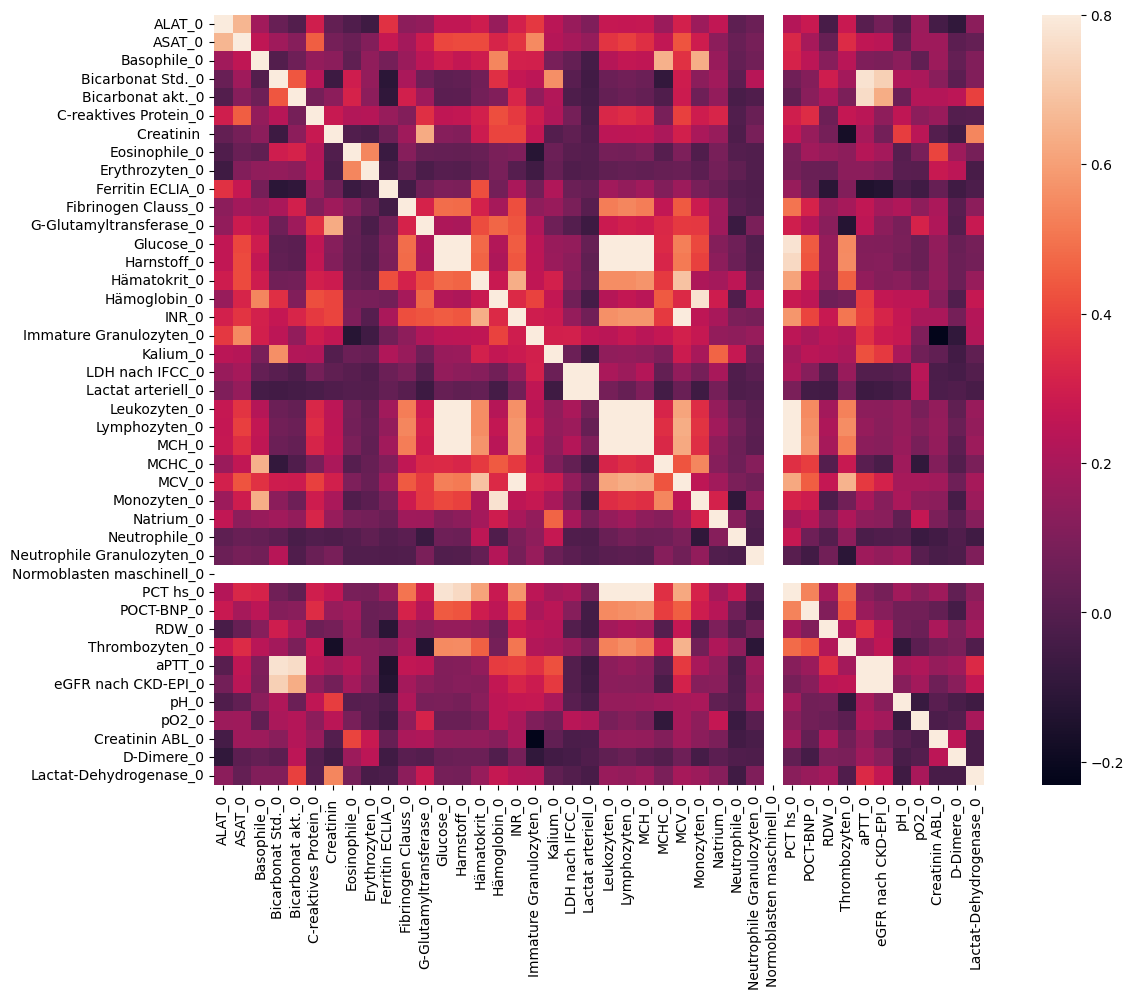

ValueError: The condensed distance matrix must contain only finite values.

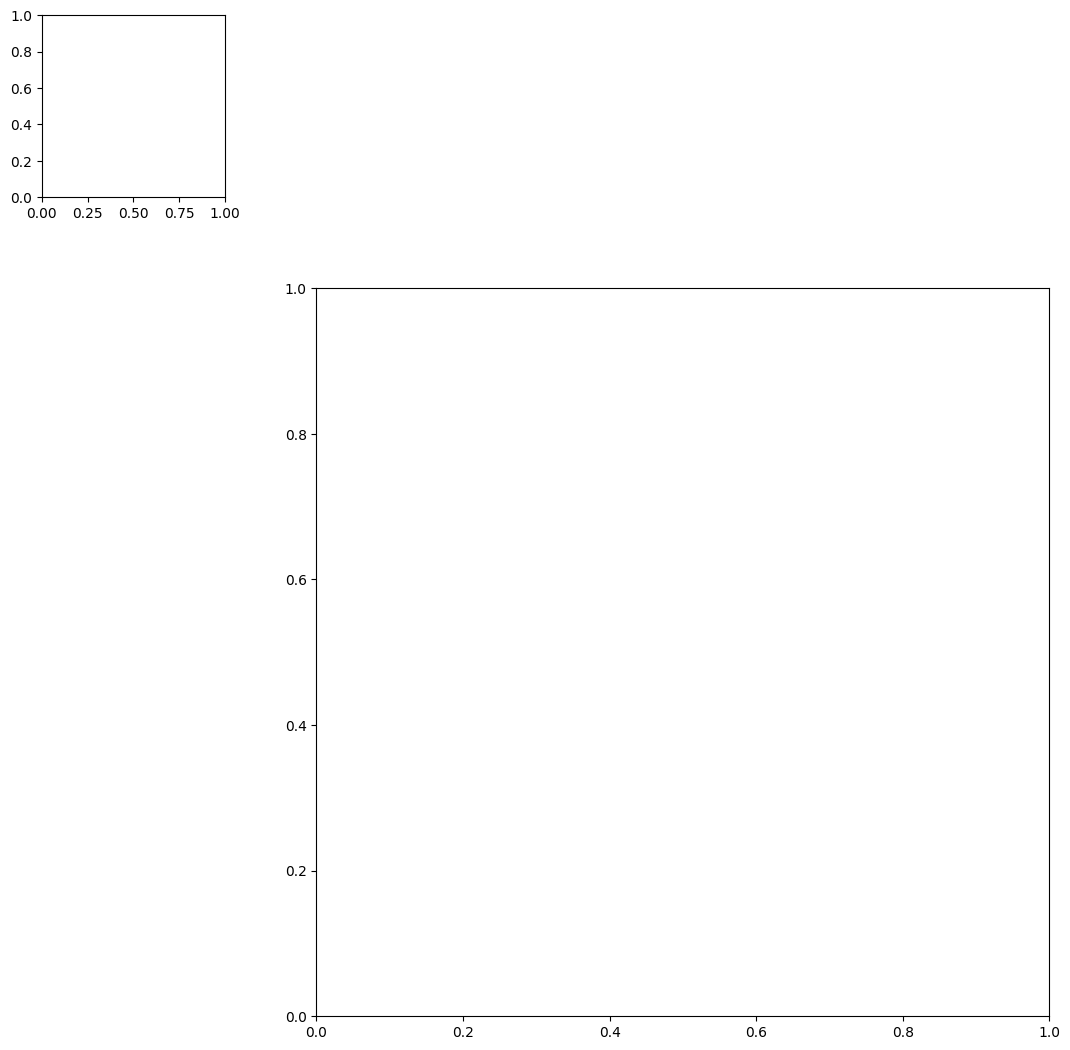

In [34]:
import pandas as pd
import seaborn as sns



ValueError: The condensed distance matrix must contain only finite values.

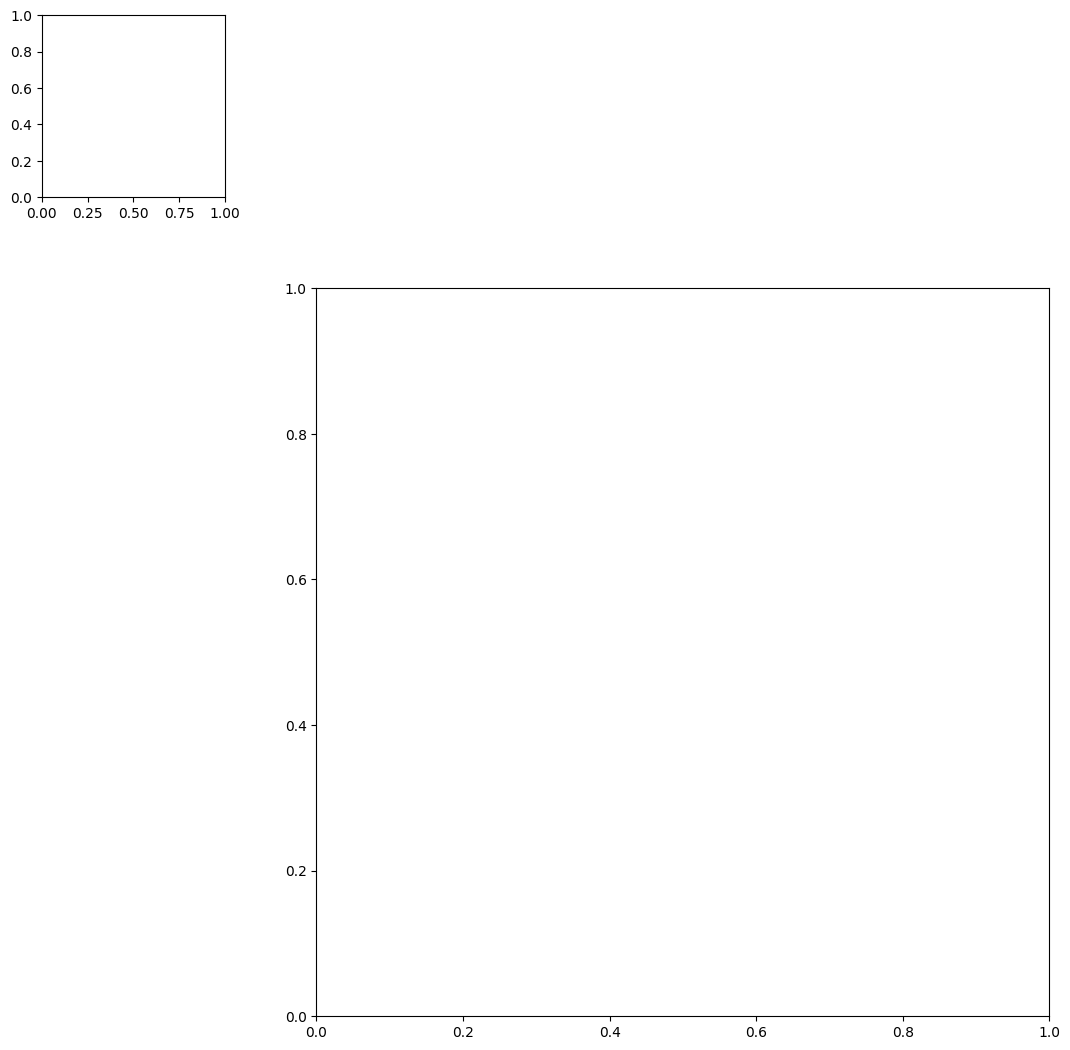

In [32]:
# Choose a subset of features for clustering
dd = d.iloc[:,1:50]

pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()

In [30]:
### Plot features as a heatmap
import pandas as pd
import seaborn as sns

## get a list of features name from the dataframe
types = df.columns.tolist()

# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names, index=types)

corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8, square=True)


ValueError: Shape of passed values is (115, 42), indices imply (42, 42)

In [85]:
### Analyzing lab markers for long covid

## Read the list of unique patient IDs
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
df = pd.read_csv(filename, sep=',', header=0)

## Read the CSV file into a DataFrame
lab_dict_dirpath = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/dicts/'
lab_dict_filename = os.path.join(lab_dict_dirpath, 'lab_data_dict.csv')
df_lab_dict = pd.read_csv(lab_dict_filename, sep=',', header=0, index_col=0)
print('df_lab_dict', df_lab_dict)

## Dataframe to store the lab markers
patients_labmarkers_df = pd.DataFrame()

for row in df.itertuples(5):
    patient_id = row.pseudoid_pid
    ## Read the folder with the lab markers
    dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
    filename = os.path.join(dir_lab_path, 'patient_'+ str(patient_id) +'.csv')

    try:
        ## Read the CSV file into a DataFrame per patient
        df_lab = pd.read_csv(filename, sep=',', header=0, index_col=0)
        print('+ patient_id: ', patient_id, df_lab.shape)

        ## Added the patient ID to the dataframe and append the corrsponding lab markers to the lab dictionary
        for row_labdata in df_lab.itertuples():
            print('row_labdata', row_labdata)
            print('row_labdata', type(row_labdata))

            ## Add the row_labdata into patients_labmarkers_df

    ## make an exception for FileNotFoundError
    except FileNotFoundError:
        print('- patient_id: ', patient_id)
        continue
    
# ## Save the dataframe to a CSV file
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid_lab.csv')
# df_lab.to_csv(filename, sep=',', header=True, index=False)

print(df_lab)
print(df_lab.shape)


df_lab_dict Empty DataFrame
Columns: [days, ALAT , aPTT, ASAT , Basophile, Bicarbonat, Bicarbonat akt., Bicarbonat Std., C-reaktives Prot. , C-reaktives Protein, Creatinin , Creatinin ABL, D-Dimer , D-Dimere, eGFR , eGFR nach CKD-EPI, Eosinophile, Erythrozyten, Ferritin ECLIA, Ferritin PETIA, Fibrinogen Clauss, G-Glutamyltransfer. , G-Glutamyltransferase, Glucose, Hämatokrit, Hämoglobin, Harnstoff, Harnstoff , Immature Granulozyten, INR, INR kapillär, INR venös kontr., Kalium, Lactat arteriell, Lactat enzymatisch, Lactat venös, Lactat-Dehydrogenase, LDH nach IFCC, Leukozyten, Lymphozyten, MCH, MCHC, MCV, Monozyten, Natrium, Neutrophile, Neutrophile Granulozyten, Normoblasten maschinell, NT-proBNP, PCT hs, pH, pO2, POCT-BNP, RDW, Thrombozyten, Troponin T , Troponin-I-hs, Troponin-T-hs]
Index: []

[0 rows x 58 columns]
+ patient_id:  1000037 (75, 39)
row_labdata Pandas(Index=0, ALAT=45.0, ASAT=57.0, Basophile=nan, _4=nan, _5=nan, _6=291.0, _7=71.0, Eosinophile=nan, Erythrozyten=4.59, _10